Text(0, 0.5, 'Eccentricity')

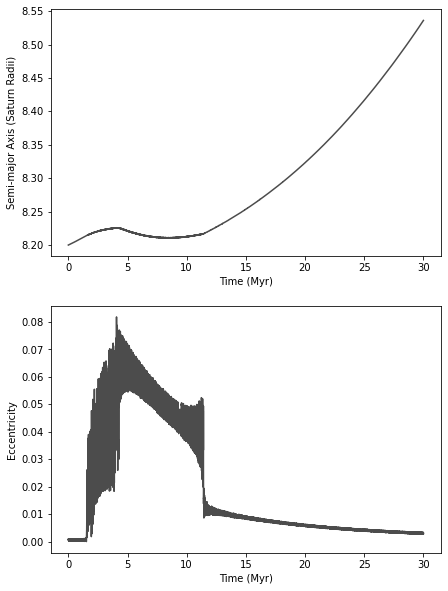

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# read arguments, and open corresponding output file
version = 4.3 # version 3 for migration force, 4 for tidal forces, 5 for eccentricity oscillations
numSamples = 10000
simTime = 30.
ia = 8.2

fa = 12.9

step = 1
col = '#4c4c4c'


buffer = 4


version_int = int(version)

if version == 3:
    f = open(r"v3out-div1.0-"+str(numSamples)+"s-"+str(ia)+"to"+str(fa)+"rs.txt", "r")
else:
    if version == 4.1:
        f = open(r"v4.1-t-"+str(ia)+"rs-"+str(numSamples)+"s-"+str(simTime)+"myrs.txt", "r")
    else:
        f = open(r"v"+str(version)+"-"+str(ia)+"rs-"+str(numSamples)+"s-"+str(simTime)+"myrs.txt", "r")


plotSamples = numSamples // step

# prep 5 arrays
a_array = [0] * plotSamples
e_array = [0] * plotSamples
i_array = [0] * plotSamples
t_array = [0] * plotSamples
diff_array = [0] * plotSamples

if version_int == 5:
    eSat_array = [0] * plotSamples

# read file
allLines = f.readlines()
f.close()
if (version_int == 3):
    incl_index = 4
    pomega_index = 2
    m_long_index = 3
    a_index = 0
    e_index = 1
    t_index = 5
    
if version_int == 4:
    incl_index = 2
    pomega_index = 3
    m_long_index = 4
    a_index = 0
    e_index = 1
    t_index = 5
    
if version_int == 5:
    a_index = 0
    e_index = 1
    incl_index = 2
    pomega_index = 3
    m_long_index = 4
    eSat_index = 5
    t_index = 6
    
for i in range(buffer, buffer + numSamples, step):
    numbers = allLines[i].split()
    a_array[(i - buffer) // step] = float(numbers[a_index])
    e_array[(i - buffer) // step] = float(numbers[e_index])
    i_array[(i - buffer) // step] = float(numbers[incl_index])*180./np.pi
    t_array[(i - buffer) // step] = float(numbers[t_index]) / 1000000.
    diff_array[(i - buffer) // step] = np.cos(float(numbers[pomega_index]) - float(numbers[m_long_index]))
    
    if version_int == 5:
        eSat_array[(i - buffer) // step] = float(numbers[eSat_index])

fig, axs = plt.subplots(2)

fig.set_size_inches(7, 10)

axs[0].plot(t_array,a_array, color=col)
axs[0].set_xlabel('Time (Myr)')
axs[0].set_ylabel('Semi-major Axis (Saturn Radii)')

axs[1].plot(t_array,e_array, color=col)
axs[1].set_xlabel('Time (Myr)')
axs[1].set_ylabel('Eccentricity')

Text(0, 0.5, "cos(Longitude of Pericenter - Sun's Mean Longitude)")

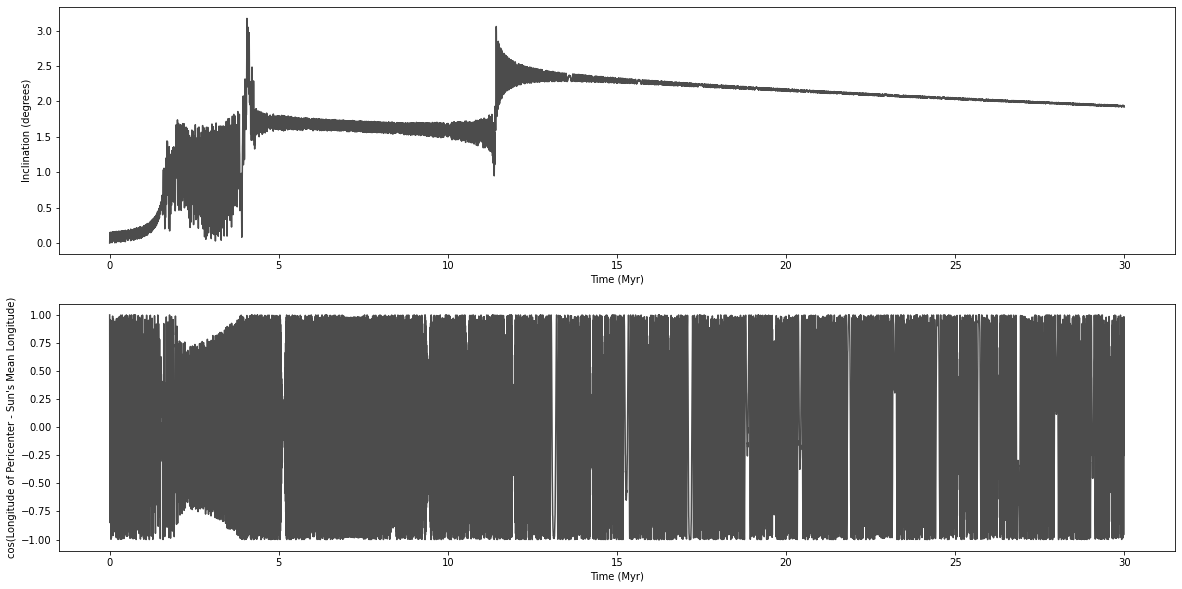

In [40]:
fig, axs = plt.subplots(2)

fig.set_size_inches(20, 10)

axs[0].plot(t_array,i_array, color=col)
axs[0].set_xlabel('Time (Myr)')
axs[0].set_ylabel('Inclination (degrees)')

axs[1].plot(t_array,diff_array, color=col)
axs[1].set_xlabel('Time (Myr)')
axs[1].set_ylabel('cos(Longitude of Pericenter - Sun\'s Mean Longitude)')

In [41]:
if version_int == 5:
    fig, axs = plt.subplots(1)
    axs.plot(t_array,eSat_array, color=col)
    axs.set_xlabel('Time (Myr)')
    axs.set_ylabel('Saturn\'s Eccentricity')

Text(0, 0.5, "cos(Longitude of Pericenter - Sun's Mean Longitude)")

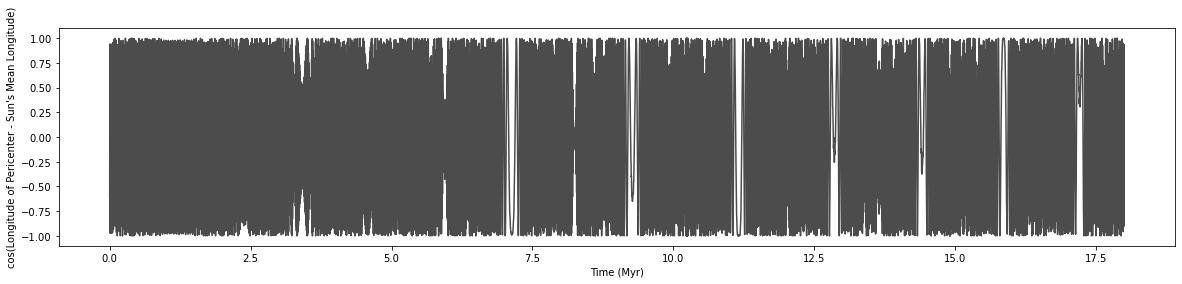

In [42]:
# plot zoom on cos(pomega-l)

start_ratio = 0.2
end_ratio = 0.8

plotSamplesZ = int(plotSamples * (end_ratio - start_ratio))

start_i = int(start_ratio * plotSamples)
end_i = start_i + plotSamplesZ

diff_Z = [0] * plotSamplesZ
t_Z = [0] * plotSamplesZ

for i in range(start_i, end_i):
    diff_Z[i - start_i] = diff_array[i]
    t_Z[i-start_i] = t_array[i]-t_array[start_i]
    
fig, axs = plt.subplots(1)

fig.set_size_inches(20, 4)

axs.plot(t_Z, diff_Z, color=col)
axs.set_xlabel('Time (Myr)')
axs.set_ylabel('cos(Longitude of Pericenter - Sun\'s Mean Longitude)')


Text(0, 0.5, "cos(Longitude of Pericenter - Sun's Mean Longitude)")

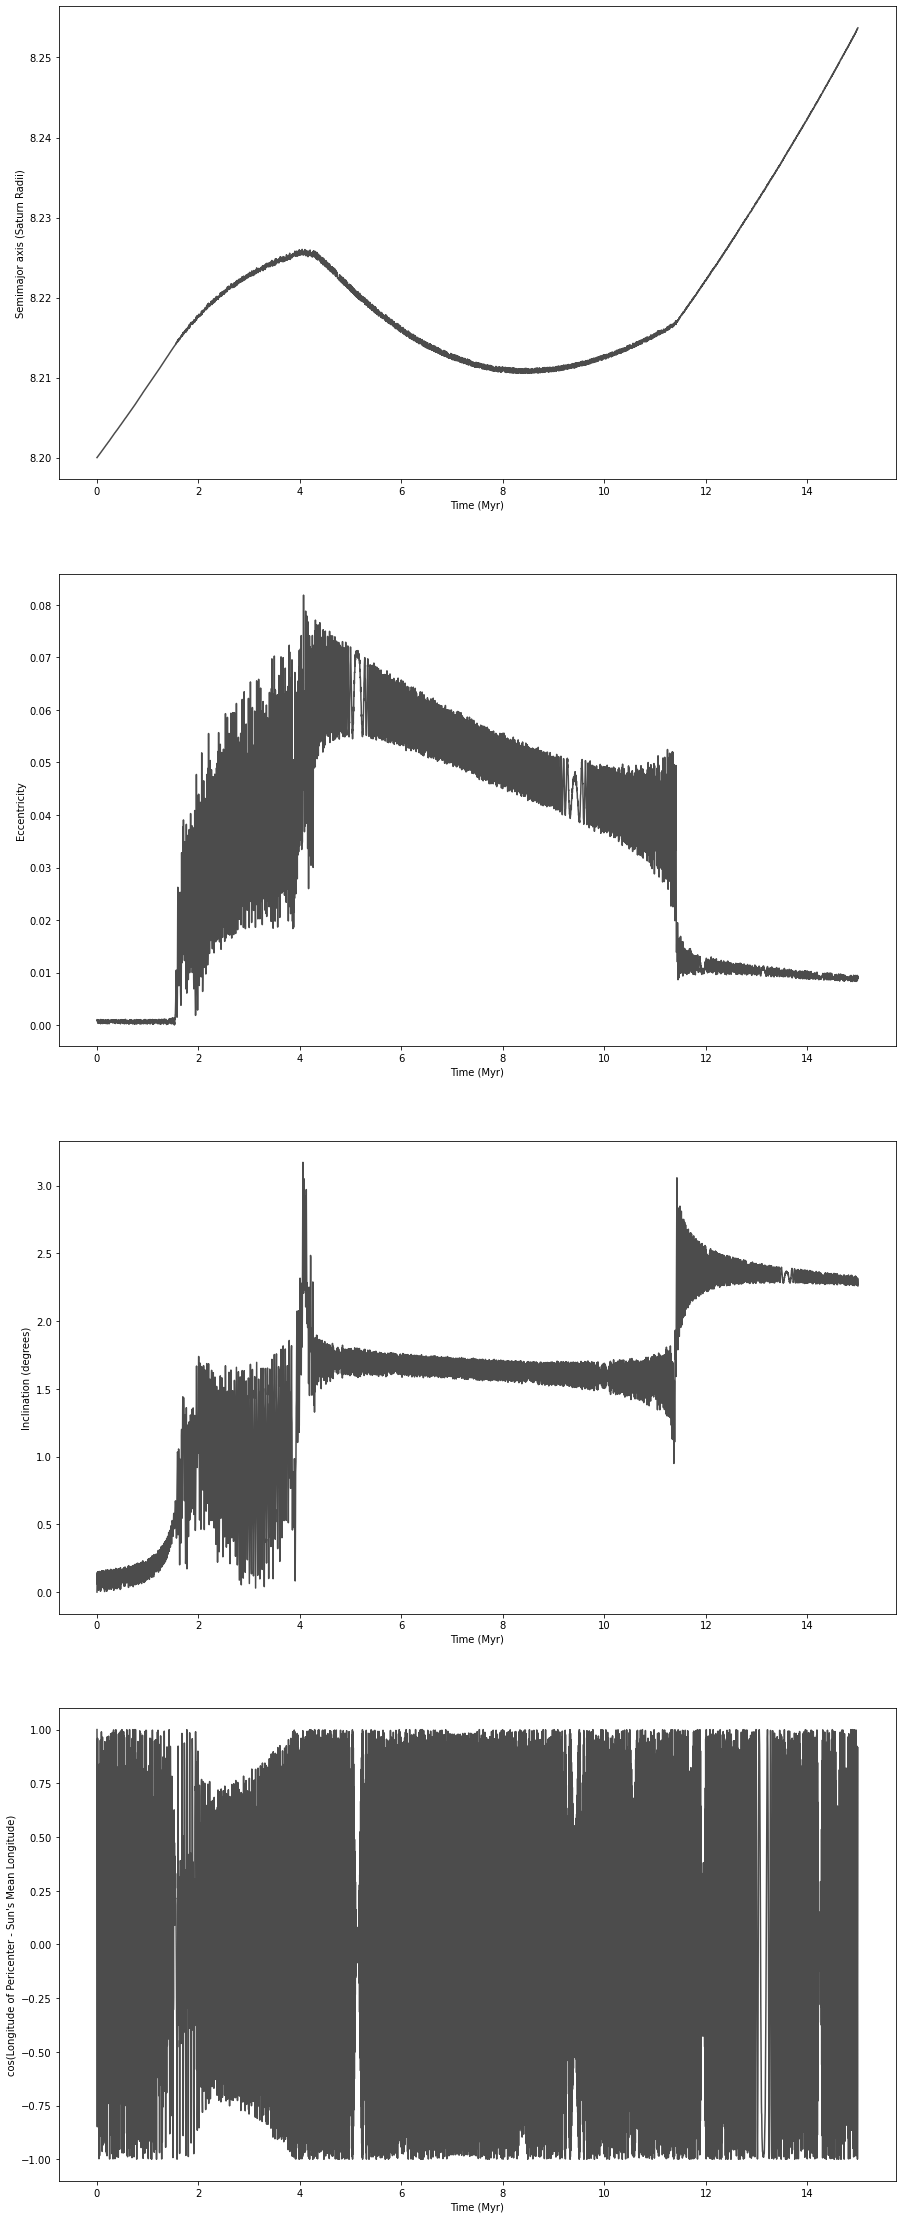

In [44]:
# plot zoom

start_ratio = 0.
end_ratio = 0.5

plotSamplesZ = int(plotSamples * (end_ratio - start_ratio))

start_i = int(start_ratio * plotSamples)
end_i = start_i + plotSamplesZ

# prep 3 arrays
a_arrayZ = [0] * plotSamplesZ
e_arrayZ = [0] * plotSamplesZ
i_arrayZ = [0] * plotSamplesZ
t_arrayZ = [0] * plotSamplesZ
diff_arrayZ = [0] * plotSamplesZ

for i in range(start_i, end_i):
    a_arrayZ[i - start_i] = a_array[i]
    e_arrayZ[i - start_i] = e_array[i]
    i_arrayZ[i - start_i] = i_array[i]
    diff_arrayZ[i - start_i] = diff_array[i]
    t_arrayZ[i - start_i] = t_array[i]

figZ, axsZ = plt.subplots(4)

figZ.set_size_inches(15, 40)

axsZ[0].plot(t_arrayZ,a_arrayZ,color=col)
axsZ[0].set_xlabel('Time (Myr)')
axsZ[0].set_ylabel('Semimajor axis (Saturn Radii)')

axsZ[1].plot(t_arrayZ,e_arrayZ,color=col)
axsZ[1].set_xlabel('Time (Myr)')
axsZ[1].set_ylabel('Eccentricity')

axsZ[2].plot(t_arrayZ,i_arrayZ,color=col)
axsZ[2].set_xlabel('Time (Myr)')
axsZ[2].set_ylabel('Inclination (degrees)')

axsZ[3].plot(t_arrayZ,diff_arrayZ,color=col)
axsZ[3].set_xlabel('Time (Myr)')
axsZ[3].set_ylabel('cos(Longitude of Pericenter - Sun\'s Mean Longitude)')

Text(0, 0.5, 'Eccentricity Damping Timescale (Myr)')

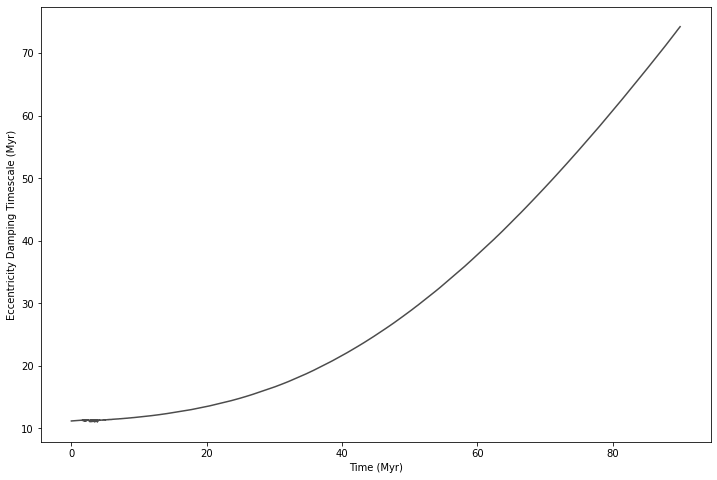

In [17]:
# Plot eccentricity decay timescale over time
G = 6.67e-11 # G in SI units ****
mSun = 1.9891e30 # mass of sun in kg ****
AU_TO_M = 1.496e+11 # meters in one AU
YR_TO_SEC = 3600*24*365.25 # seconds in a year

mSat = 0.0002857 # mass of saturn in solar masses
rSat = 0.00038926024 # radius of Saturn in AU
mTitan = 0.0000000676319759 # mass of titan in solar masses
rTitan = 0.04421567543 # radius of Titan in Saturn radii
ks = 0.15 # Titan's tidal Love number
Q = 100. # tidal Q factor for Titan (estimated)

q = mSat/mTitan

const = -27.*ks*q*(1+q)*rTitan**8

tau_e_array = [0] * plotSamples

GMTitan = G*mTitan*mSun
GMSat = G*mSat*mSun

T_per_nm = (2*Q*(rTitan*rSat*AU_TO_M)**3)/(GMTitan)

for i in range(plotSamples):
    e = e_array[i]
    a = a_array[i]
    
    # calculate f2, f3, f4, f5
    f2 = 1 + (15./2.)*(e**2) + (45./8.)*(e**4) + (5./16.)*(e**6)
    f3 = 1 + (15./4.)*(e**2) + (15./8.)*(e**4) + (5./64.)*(e**6)
    f4 = 1 + (3./2.)*(e**2) + (1./8.)*(e**4)
    f5 = 1 + (3.)*(e**2) + (3./8.)*(e**4)
    
    nmTitan = np.sqrt(GMSat/((a*rSat*AU_TO_M)**3)) # mean motion of Titan
    spinTitan_per_nm = f2 / (f5*(1-e**2)**(3./2.))
    T = T_per_nm*nmTitan
    
    e_dot = (const/(T*a**8))*(e/((1-e**2)**(13./2.)))*(f3-((11./18.)*(1-e**2)**(3./2.)*f4*spinTitan_per_nm))
    
    tau_e_array[i] = -(e/e_dot)/YR_TO_SEC/1000000.
    
    
fig2, axes = plt.subplots(1)

fig2.set_size_inches(12, 8)

axes.plot(t_array,tau_e_array,color=col)
axes.set_xlabel('Time (Myr)')
axes.set_ylabel('Eccentricity Damping Timescale (Myr)')


In [19]:
# inclination damping calculations

G = 6.67e-11
k2 = 0.341
mass_ratio = 4225.
mSat = 5.683e26
rSat = 58232503.3
Omega = 2.*np.pi/(10.656*3600.)

i0 = 2.5*np.pi/180.
a0 = 8.25*rSat

const_1 = np.sqrt(1+(1/mass_ratio))/4.
const_2 = np.sqrt(1+(1/mass_ratio))/6.*np.sqrt(G*mSat)/Omega

# calculate last constant based on data point above
const = i0*a0**const_1/(np.exp(const_2*a0**(-3./2.)))

a = 21.*rSat
i = const/(a**const_1)*np.exp(const_2*a**(-3./2.)) # radians
i_deg = i*180./np.pi
print(i_deg)

1.9513131594124726
